In [1]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas

kicktype = ["TurningKick", "AxeKick", "CutKick", "CrescentKick"]
export_list = []

for type in kicktype:
    path = "csv/Right_" + type + "_CSV/"
    for x in range(50):
        allFiles = (path+type+str(x+1)+"_Accelerometer.csv")
        allGyroscopeFiles = (path+type+str(x+1)+"_Gyroscope.csv")

        df = pandas.read_csv(allFiles, skiprows=4)
        df.dropna(subset = ["Date"], inplace=True)
        acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
        acc = np.sqrt(acc)

        for i, j in enumerate(acc[:-1]):
            if (j < acc[i+1])and(j>1000): 
                start = i
                break

        end = max(idx for idx, val in enumerate(acc)  
                                          if val > 1000)

        acc=acc.iloc[start:end]
        HostTime = df['HostTimestamp']
        HostTime=HostTime.iloc[start:end]
        HostTime = HostTime.astype('int64')
        HostTime -= HostTime[start]
        HostTime /= 1000

        df2 = pandas.read_csv(allGyroscopeFiles, skiprows=4)
        df2.dropna(subset = ["Date"], inplace=True)
        df2=df2.iloc[start:end]

        export_list.append([acc.mean(), acc.std(), acc.min(), acc.max(), kicktype.index(type)+1, df2['X (dps)'].mean(), df2['X (dps)'].std(), df2['X (dps)'].min(), df2['X (dps)'].max()
                           , df2['Y (dps)'].mean(), df2['Y (dps)'].std(), df2['Y (dps)'].min(), df2['Y (dps)'].max()
                           , df2['Z (dps)'].mean(), df2['Z (dps)'].std(), df2['Z (dps)'].min(), df2['Z (dps)'].max()])

        acc=np.array(acc)/1000
        HostTime = np.array(HostTime)

        plt.plot(HostTime,acc,'r-')
        plt.xlabel('time [s]')
        plt.ylabel('acceleration [g]')
    plt.show()


with open('Accelerometer.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "kick_Type", "GyrX_mean", "GyrX_std", "GyrX_min", "GyrX_max"
                    , "GyrY_mean", "GyrY_std", "GyrY_min", "GyrY_max"
                    , "GyrZ_mean", "GyrZ_std", "GyrZ_min", "GyrZ_max"])
    for row in export_list:
        writer.writerow(row)
    
    
    

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

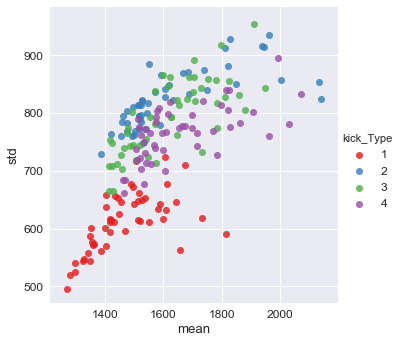

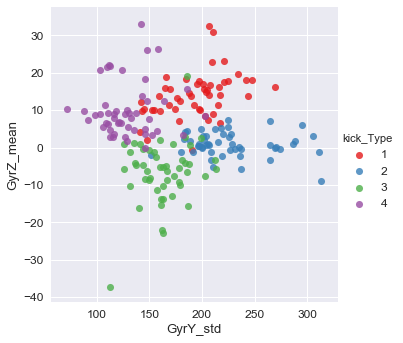

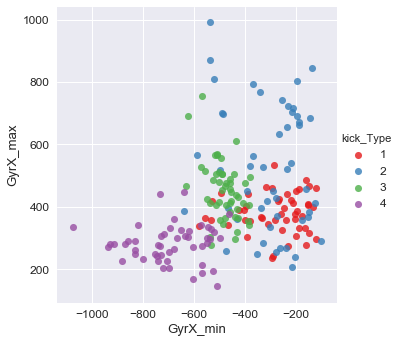

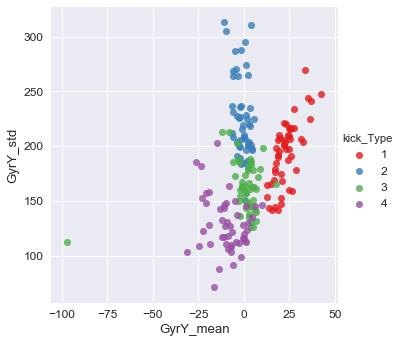

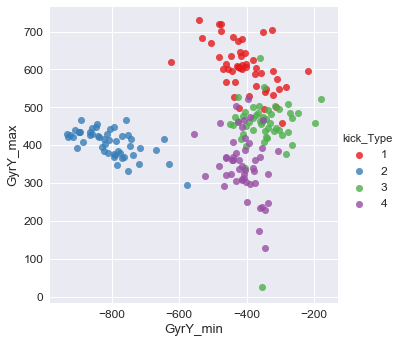

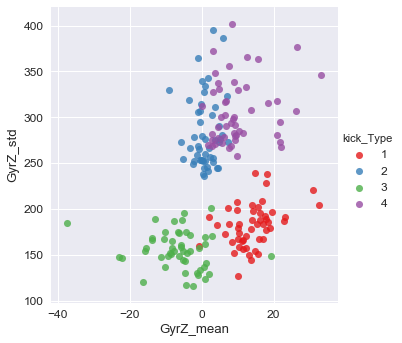

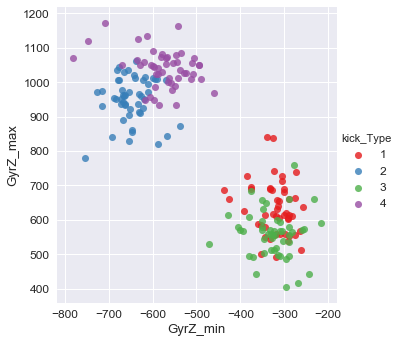

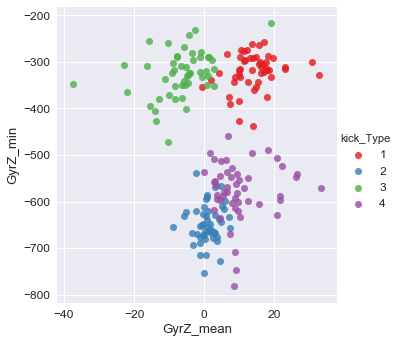

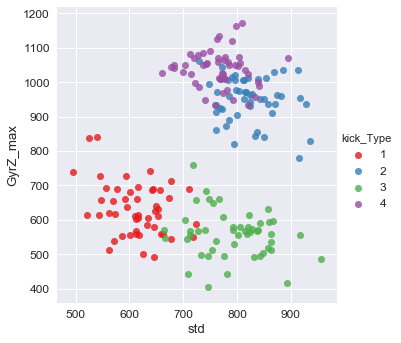

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('Accelerometer.csv')

sns.lmplot('mean', 'std',
           data=data,
           hue='kick_Type',
           #col='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_std', 'GyrZ_mean',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrX_min', 'GyrX_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_mean', 'GyrY_std',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_min', 'GyrY_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_mean', 'GyrZ_std',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_min', 'GyrZ_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_mean', 'GyrZ_min',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('std', 'GyrZ_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

In [3]:
from sklearn import svm
#---Converting the Columns as Matrices---
points = data[['GyrZ_mean','GyrZ_std']].values
result = data['kick_Type']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
       np.abs(clf.dual_coef_))

Vector of weights (w) =  [ 0.16047438 -0.06333703]
b =  13.794158942570625
Indices of support vectors =  [  4   6   8  15  21  27  47  50  51  55  56  57  58  59  63  68  72  73
  76  78  80  81  84  86  91  94 105 109 116 117 118 135 152 153 158 162
 164 167 168 169 172 174 175 176 178 180 183 185 188 192 193 198]
Support vectors =  [[ 6.60652174e+00  1.73105625e+02]
 [ 1.90704225e+00  1.91250813e+02]
 [ 4.25616438e+00  1.81957582e+02]
 [ 1.48125000e+01  2.39529277e+02]
 [-6.32307692e-01  1.59617024e+02]
 [ 8.93064516e+00  1.52442068e+02]
 [ 1.01621053e+01  1.26945365e+02]
 [ 4.87804878e+00  2.90839810e+02]
 [ 3.70681818e+00  3.10952549e+02]
 [ 4.88846154e+00  2.72874303e+02]
 [ 5.91923077e+00  3.86410358e+02]
 [ 3.09622642e+00  2.55043166e+02]
 [ 2.88636364e+00  3.02341682e+02]
 [ 7.03428571e+00  3.23602766e+02]
 [ 4.44558824e+00  2.44840295e+02]
 [ 7.47457627e-01  2.35475496e+02]
 [ 4.12027027e+00  2.44873807e+02]
 [ 3.09500000e+00  2.51031518e+02]
 [ 7.24545455e+00  2.73330669e+02]

Text(0.5,1,'Different kicking group')

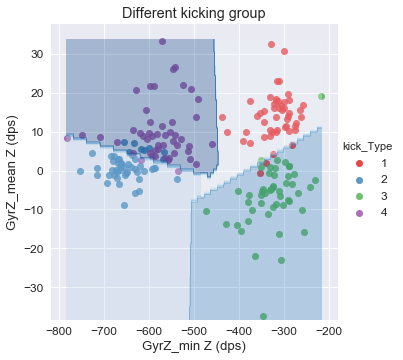

In [4]:
X = data[['GyrZ_min','GyrZ_mean']].values
y = result
model = svm.SVC(kernel='linear').fit(X, y)

sns.lmplot('GyrZ_min', 'GyrZ_mean',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
#h = (x_max / x_min) / 20

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                     np.arange(y_min, y_max))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('GyrZ_min Z (dps)')
plt.ylabel('GyrZ_mean Z (dps)')
plt.title("Different kicking group")

In [5]:
def Kick(feature1, feature2):
    if(model.predict([[feature1, feature2]]))==1:
        print('Turning Kick!')
    elif(model.predict([[feature1, feature2]]))==2:
        print('AxeKick!')
    elif(model.predict([[feature1, feature2]]))==3:
        print('CutKick!')
    elif(model.predict([[feature1, feature2]]))==4:
        print('CrescentKick!')
        

In [6]:

Kick(1.24125, -433.1)


CutKick!


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)



In [8]:
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)


(140, 2)
(140,)
(60, 2)
(60,)


In [11]:
print(x_train)

[[-5.24700000e+02  2.20686275e+01]
 [-4.89700000e+02  1.83314286e+01]
 [-6.32500000e+02  7.03428571e+00]
 [-5.97100000e+02  4.60800000e+00]
 [-3.26400000e+02  9.96885246e+00]
 [-6.64000000e+02  9.58000000e-01]
 [-2.81800000e+02 -3.37058824e+00]
 [-5.12600000e+02  4.91052632e+00]
 [-3.43400000e+02  1.24180556e+01]
 [-6.29700000e+02  3.09622642e+00]
 [-6.63300000e+02  1.56896552e-01]
 [-2.90200000e+02 -7.62777778e+00]
 [-7.27100000e+02  4.44558824e+00]
 [-4.01500000e+02 -5.27727273e+00]
 [-3.31300000e+02  1.04354839e+00]
 [-6.21800000e+02 -5.27678571e+00]
 [-3.53600000e+02  1.48125000e+01]
 [-5.96400000e+02  2.16431818e+01]
 [-2.74000000e+02  1.22474359e+01]
 [-6.50500000e+02 -6.20754717e-01]
 [-5.49600000e+02  1.24135135e+01]
 [-5.87900000e+02  2.17039216e+01]
 [-2.97500000e+02  1.12642857e+01]
 [-6.47100000e+02  1.60714286e+00]
 [-2.83000000e+02  6.60652174e+00]
 [-6.54100000e+02 -8.92812500e+00]
 [-6.27100000e+02 -3.63888889e-01]
 [-6.39100000e+02  9.15789474e-01]
 [-5.08200000e+02  2

In [12]:
print(Y_train)

170    4
182    4
59     2
185    4
12     1
74     2
120    3
176    4
19     1
57     2
66     2
138    3
63     2
136    3
101    3
89     2
15     1
177    4
10     1
96     2
199    4
173    4
36     1
95     2
4      1
98     2
87     2
83     2
168    4
191    4
      ..
196    4
103    3
129    3
41     1
106    3
137    3
121    3
146    3
125    3
86     2
30     1
175    4
65     2
44     1
27     1
80     2
181    4
113    3
143    3
7      1
158    4
112    3
155    4
190    4
8      1
73     2
144    3
118    3
189    4
99     2
Name: kick_Type, Length: 140, dtype: int64


In [14]:

#---Converting the Columns as Matrices---
points = x_train
result = Y_train

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
       np.abs(clf.dual_coef_))

Vector of weights (w) =  [0.01934384 0.00310195]
b =  9.406309253705526
Indices of support vectors =  [ 18  24  74 101 124 134   2   9  30  37  43  69  85  99 125 135  14  90
 103 136 137   3  32  33  58  66  75  94 104 121 138]
Support vectors =  [[-2.74000000e+02  1.22474359e+01]
 [-2.83000000e+02  6.60652174e+00]
 [-2.89300000e+02  1.01621053e+01]
 [-4.36800000e+02  1.38876923e+01]
 [-3.31600000e+02  8.93064516e+00]
 [-3.24900000e+02  4.25616438e+00]
 [-6.32500000e+02  7.03428571e+00]
 [-6.29700000e+02  3.09622642e+00]
 [-6.84400000e+02  3.62727273e+00]
 [-6.38000000e+02  4.12027027e+00]
 [-5.37600000e+02 -2.27647059e+00]
 [-6.55900000e+02  7.24545455e+00]
 [-6.10400000e+02  5.22037037e+00]
 [-5.86900000e+02  7.47457627e-01]
 [-6.16900000e+02  5.56909091e+00]
 [-5.68700000e+02  3.09500000e+00]
 [-3.31300000e+02  1.04354839e+00]
 [-3.51400000e+02  2.68709677e+00]
 [-2.17200000e+02  1.91878788e+01]
 [-4.05000000e+02 -1.38951220e+01]
 [-2.97000000e+02  2.10869565e+00]
 [-5.97100000e+02

In [16]:
kick_pred = model.predict(x_test)
print(kick_pred)

[3 2 3 3 4 4 3 3 1 2 4 1 3 1 4 3 1 1 3 3 2 1 2 4 2 2 4 1 4 2 1 4 1 3 4 2 4
 3 3 1 4 2 4 1 1 1 4 1 4 3 3 3 1 4 3 1 4 3 2 3]


In [21]:
print(Y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test,kick_pred))


119    3
77     2
148    3
149    3
154    4
151    4
122    3
6      1
28     1
71     2
188    4
34     1
21     1
40     1
55     2
104    3
3      1
39     1
117    3
134    3
180    4
26     1
54     2
165    4
53     2
93     2
174    4
17     1
56     2
84     2
25     1
156    4
42     1
141    3
50     2
51     2
195    4
116    3
142    3
24     1
159    4
62     2
166    4
45     1
23     1
1      1
162    4
48     1
160    4
126    3
123    3
107    3
43     1
152    4
114    3
46     1
172    4
102    3
61     2
115    3
Name: kick_Type, dtype: int64
Accuracy: 0.9


In [24]:
mykick = (x_test[0])
mykick = np.reshape(mykick, (-1, 2))

print(mykick)


[[-321.1          -1.14821429]]


In [25]:
print(model.predict(mykick))

[3]
